In [47]:
def getGalpropNuclei(fits,A,Z,R=8.5):
    """
    Given a galprop 3d nuclear file (non-full), return the energy and spectrum.
    
    :param fits: path to the nuclear data fits file
    :param A: Atomic number of desired nucleus  
    :param Z: Atomic charge of desired nucelus.  All species meeting A,Z will be summed
    :param R: The desired radius to evaluate the spectrum. Linearly interpolated over grid
    :returns energies, spectrum: energies in GeV, spectrum in (GeV/nuc)^2 (m^2 sr s GeV/nuc)^-1 
    """
    # open the fits file
    hdu = pyfits.open(fits)
    
    hdr = hdu[0].header
    
    # Build list of radii and energies based on header keywords.
    r_list = np.linspace(hdr['CRVAL1'],hdr['CRVAL1']+(hdr['NAXIS1']-1)*hdr['CDELT1'],hdr['NAXIS1'])
    energies = 10.**np.linspace(hdr['CRVAL3'],hdr['CRVAL3']+(hdr['NAXIS3']-1)*hdr['CDELT3'],hdr['NAXIS3'])
    
    # Build a list of the nuclei
    A_list, Z_list = [], []
    for nucIndex in range(hdr['NAXIS4']):
        nucString = ('%.3f' % ((nucIndex+1)/1000.))[-3:]
        A_list.append(hdr['NUCA'+nucString])
        Z_list.append(hdr['NUCZ'+nucString])
        
    A_list = np.array(A_list)
    Z_list = np.array(Z_list)
    
    z_idx = np.abs(hdr['CRVAL2'])/hdr['CDELT2']
    
    # Linearly interpolate spectra in radius.
    i_r2 = np.argmax(r_list>R) # finds the first element at r>R
    i_r1 = i_r2-1 # finds the next smallest radius.
    dr = r_list[i_r2]-r_list[i_r1]
    w1 = (r_list[i_r2]-R)/dr # weight for spectrum i_r1
    w2 = 1.-w1 # weight for spectrum i_r2
    
    master = np.zeros(hdu[0].shape[1])
    # Find which indices contain A,Z requested.  Could be more than one since primary and secondary are specified. 
    idx = np.where((A_list==A) & (Z_list==Z))[0]
    
    if len(idx)==0:
        raise Exception('No nuclei found with A,Z='+str(A)+','+str(Z))
    for i in idx:
        master += w1*hdu[0].data[i,:,z_idx,i_r1]
        master += w2*hdu[0].data[i,:,z_idx,i_r2]
  
    return energies/1e3, master*1e4/energies**2*1e3

In [49]:

print t, f


[  1.00000000e-01   1.50000000e-01   2.25000000e-01   3.37500000e-01
   5.06250000e-01   7.59375000e-01   1.13906250e+00   1.70859375e+00
   2.56289062e+00   3.84433594e+00   5.76650391e+00   8.64975586e+00
   1.29746338e+01   1.94619507e+01   2.91929260e+01   4.37893890e+01
   6.56840836e+01   9.85261253e+01   1.47789188e+02   2.21683782e+02
   3.32525673e+02   4.98788510e+02   7.48182764e+02   1.12227415e+03
   1.68341122e+03   2.52511683e+03   3.78767524e+03   5.68151287e+03
   8.52226930e+03   1.27834039e+04   1.91751059e+04   2.87626589e+04
   4.31439883e+04   6.47159825e+04   9.70739737e+04] [  6.98882490e+19   1.66936285e+20   3.06698792e+20   2.80689603e+20
   2.47050568e+20   1.98932083e+20   1.39024339e+20   8.03015304e+19
   3.71279867e+19   1.35596966e+19   3.90823109e+18   8.92091572e+17
   1.61739677e+17   2.32951459e+16   2.66163796e+15   2.40398810e+14
   1.71003175e+13   9.56818365e+11   4.27484872e+10   1.57769588e+09
   4.94820439e+07   1.32189036e+06   2.94808303e+0

[  1.00000000e-01   1.50000000e-01   2.25000000e-01   3.37500000e-01
   5.06250000e-01   7.59375000e-01   1.13906250e+00   1.70859375e+00
   2.56289062e+00   3.84433594e+00   5.76650391e+00   8.64975586e+00
   1.29746338e+01   1.94619507e+01   2.91929260e+01   4.37893890e+01
   6.56840836e+01   9.85261253e+01   1.47789188e+02   2.21683782e+02
   3.32525673e+02   4.98788510e+02   7.48182764e+02   1.12227415e+03
   1.68341122e+03   2.52511683e+03   3.78767524e+03   5.68151287e+03
   8.52226930e+03   1.27834039e+04   1.91751059e+04   2.87626589e+04
   4.31439883e+04   6.47159825e+04   9.70739737e+04]
[  1.00000000e-01   1.50000000e-01   2.25000000e-01   3.37500000e-01
   5.06250000e-01   7.59375000e-01   1.13906250e+00   1.70859375e+00
   2.56289063e+00   3.84433594e+00   5.76650391e+00   8.64975586e+00
   1.29746338e+01   1.94619507e+01   2.91929260e+01   4.37893890e+01
   6.56840836e+01   9.85261253e+01   1.47789188e+02   2.21683782e+02
   3.32525673e+02   4.98788510e+02   7.48182764e+0

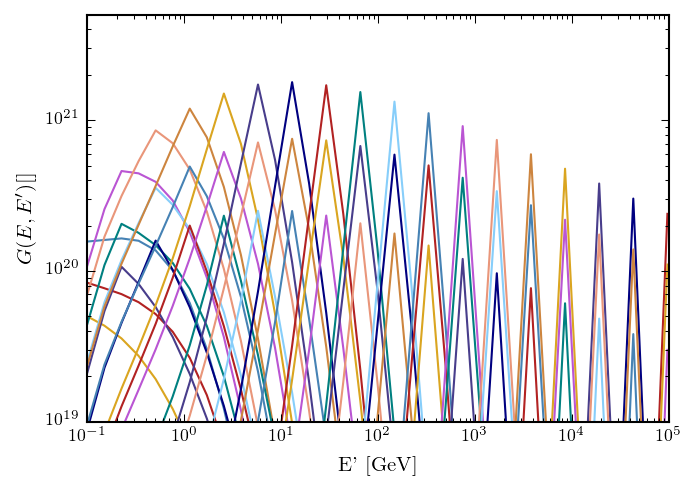

In [63]:
for i in range(0,35):
    if i%2==0:
        t, f= getGalpropNuclei(fits='/data/galprop2/output/nuclei_54_green_func_MAX_'+str(i)+'.gz',A=1,Z=-1)
        plt.loglog(t,f)
        t, f= getGalpropNuclei(fits='/data/galprop2/output/nuclei_54_green_func_MED_'+str(i)+'.gz',A=1,Z=-1)
        plt.loglog(t,f)
        t, f= getGalpropNuclei(fits='/data/galprop2/output/nuclei_54_green_func_MIN_'+str(i)+'.gz',A=1,Z=-1)
        plt.loglog(t,f)

plt.ylabel("$G(E,E') []$")
plt.xlabel("E' [GeV]")



plt.ylim(1e19,5e21)
print t

e_list= np.array([.1*1.5**i for i in range(0,35)])

print e_list
